开始100次迭代:绿色曲线为Ltrain，红色曲线为Lvalidation


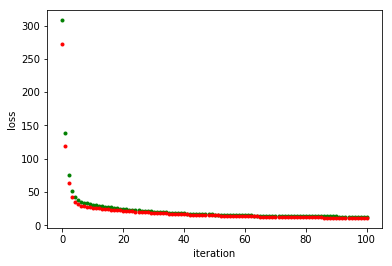

完成


In [1]:
from numpy import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
mem = Memory("./mycache")
@mem.cache

def get_data():
    data = load_svmlight_file("h")
    return data[0], data[1]


def model(weight,x):                   #线性模型
    return x.dot(weight)

def loss(weight,x,y,l):                  #Loss函数
    sum = 0.
    idex = 0
    y = mat (y)
    y = y.T
    for line in y:
          y_pred = model(weight,x[idex ,:])     
          y_pred = y_pred - y[idex ,:]
          y_pred = y_pred**2
          sum = sum + y_pred
          idex = idex + 1
    return sum/2/l                           

def grad(weight,idex_weight,x,y,rate,l):     #求得所有样本对Loss函数的梯度G并取负方向D
    idex = 0
    sum = 0.
    for line in y:
            y_pred = model(weight,x[idex ,:]) - y[idex]
            y_pred = y_pred * x[idex,idex_weight]  
            idex = idex +1
            sum = sum + y_pred
    return -sum/l


def updateW(weight,x,y,rate,l):     #更新模型参数
    idex_weight = 0
    for line1 in weight:
            weight[idex_weight]= weight[idex_weight] + rate * grad(weight,idex_weight,x,y,rate,l) 
            idex_weight = idex_weight+1
    return weight                            

    
def linearRegression(x,y):                           #线性回归函数
    start = time.clock()
    weight = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])    #线性模型参数全零初始化
    iter = 0                #迭代器
    iter = int(iter)
    iterations = []
    loss_rec = []      #记录loss函数值
    l = len(y)   
    l = int(l)
    rate = 0.1               #学习率

    loss_val = loss(weight,x,y,l)           #选择Loss函数及对其求导
    loss_rec.append(loss_val)
    iterations.append(iter)
    while iter < 100:
          weight = updateW(weight,x,y,rate,l)              #计算梯度
          loss_updata = loss(weight,x,y,l)                 #计算Loss
          iter = iter + 1
          loss_val = loss_updata
          loss_rec.append(loss_val)
          iterations.append(iter)
    end = time.clock()
    return loss_rec,iterations

def showLoss(X_train,y_train,X_test,y_test):         # 显示loss随迭代次数的变化图
    plt.xlabel('iteration')                   
    plt.ylabel('loss')                              
    plt.plot(X_train,y_train,'g.')
    plt.plot(X_test,y_test,'r.')
    plt.show()

def add_bias(X):
    temp_y=X.shape[1]+1
    temp=ones((X.shape[0],temp_y))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            temp[i,j]=X[i,j]
    return temp
    
X, y = get_data()
X=add_bias(X)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("开始100次迭代:绿色曲线为Ltrain，红色曲线为Lvalidation")
Ltrain,iter_train= linearRegression(X_train,y_train)
Lvalidation,iter_validation= linearRegression(X_test,y_test)
showLoss(mat(np.array(iter_train)),mat(np.array(Ltrain)),mat(np.array(iter_validation)),mat(np.array(Lvalidation)))
print("完成")

